In [161]:
!sinfo --partition=mpcs_hifmb.p,mpcp_hifmb.p -N -o '%N %P %11T %20E %C %8m %8e %8d'

NODELIST PARTITION STATE       REASON               CPUS(A/I/O/T) MEMORY   FREE_MEM TMP_DISK
mpcp003 mpcp_hifmb.p idle        none                 0/128/0/128 4124000  4047206  0       
mpcs043 mpcs_hifmb.p mixed       none                 121/7/0/128 770000   723794   0       
mpcs044 mpcs_hifmb.p mixed       none                 121/7/0/128 770000   680014   0       
mpcs045 mpcs_hifmb.p mixed       none                 121/7/0/128 770000   716259   0       
mpcs046 mpcs_hifmb.p mixed       none                 127/1/0/128 770000   687992   0       
mpcs047 mpcs_hifmb.p mixed       none                 95/33/0/128 770000   693506   0       
mpcs048 mpcs_hifmb.p maint       none                 0/128/0/128 770000   753962   0       
mpcs049 mpcs_hifmb.p mixed       none                 120/8/0/128 770000   702612   0       
mpcs050 mpcs_hifmb.p mixed       none                 10/118/0/128 770000   711541   0       
mpcs051 mpcs_hifmb.p idle        none                 0/128/0/128 770

In [11]:
import pandas as pd
import numpy as np
import subprocess
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
!echo "Assinica_1" > ../prefixes.txt

In [13]:
!cat ../references/sfon_with_mito.bed | tail -1 > ../references/exclude_dnapipete.bed

In [1]:
%%bash
source ~/.bashrc
conda activate orbicella
/dss/work/noge4093/FamDB-2.0.1/famdb.py \
    -i /fs/dss/work/noge4093/dfam/ \
    families \
    -f fasta_name \
    -d Salmoniformes \
    --include-class-in-name \
    > /user/noge4093/salmonid_library.fasta

In [9]:
for cov in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]:
    task = "dnapipete_slurm"
    mem = "100"
    cpus = "20"
    indir = "/fs/dss/work/noge4093/brook_trout/mapped/"
    infile = "../prefixes.txt"
    outdir = "/fs/dss/work/noge4093/acro_popgen_variants/trout_mitoassembly/repeat_coverage_eval_" + str(cov) 
    excluderegions = "../references/exclude_dnapipete.bed"
    dnapipeimg = "~/dnaPipeTE/dnapipete.img"
    template = "../dnapipte_template.sh"
    coverage = str(cov)
    genomesize = "2491876254"
    repeatlib = "/user/noge4093/salmonid_library.fasta"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + infile + " " + outdir + " " + 
         excluderegions + " " + dnapipeimg + " " + template + " " + 
         coverage + " " + genomesize + " " + repeatlib ], shell=True)

Submitted batch job 6984994
Submitted batch job 6984995
Submitted batch job 6984996
Submitted batch job 6984997
Submitted batch job 6984998
Submitted batch job 6984999
Submitted batch job 6985000
Submitted batch job 6985001
Submitted batch job 6985002
Submitted batch job 6985003


In [8]:
repeatsaturation = pd.DataFrame()
for cov in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
    tmp = pd.read_csv("../repeat_coverage_eval_" + str(cov) + 
                "/Assinica_1/Assinica_1/dnaPipeTE_pie.csv")
    tmp["Coverage"] = str(cov)
    repeatsaturation = pd.concat([repeatsaturation, tmp]).reset_index(drop=True)

(0.0, 20.0)

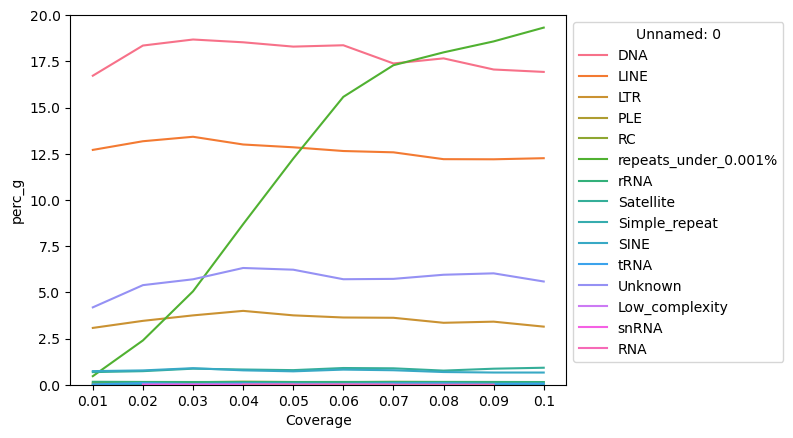

In [12]:
ax = sns.lineplot(data = repeatsaturation[~repeatsaturation["Unnamed: 0"].str.contains("^1")], x = "Coverage", y = "perc_g", hue = "Unnamed: 0")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0,20)

In [16]:
!ls /fs/dss/work/noge4093/brook_trout/mapped/*.markdup.bam \
    | sed "s:/fs/dss/work/noge4093/brook_trout/mapped/::g" | sed "s:.markdup.bam::g" \
    > ../prefixes.txt

In [21]:
task = "dnapipete_slurm"
mem = "700"
cpus = "120"
indir = "/fs/dss/work/noge4093/brook_trout/mapped/"
infile = "../prefixes.txt"
outdir = "/fs/dss/work/noge4093/acro_popgen_variants/trout_mitoassembly/repeat_content"
excluderegions = "../references/exclude_dnapipete.bed"
dnapipeimg = "~/dnaPipeTE/dnapipete.img"
template = "../dnapipte_template.sh"
coverage = "0.1"
genomesize = "2491876254"
repeatlib = "/user/noge4093/salmonid_library.fasta"
subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
     cpus + " ../" + task + ".sh " + 
     indir + " " + infile + " " + outdir + " " + 
     excluderegions + " " + dnapipeimg + " " + template + " " + 
     coverage + " " + genomesize + " " + repeatlib ], shell=True)

Submitted batch job 7001337


CompletedProcess(args=['sbatch --mem=700g --ntasks=120 ../dnapipete_slurm.sh /fs/dss/work/noge4093/brook_trout/mapped/ ./xaa /fs/dss/work/noge4093/acro_popgen_variants/trout_mitoassembly/repeat_content ../references/exclude_dnapipete.bed ~/dnaPipeTE/dnapipete.img ../dnapipte_template.sh 0.1 2491876254 /user/noge4093/salmonid_library.fasta'], returncode=0)

In [3]:
!ls ../../../brook_trout/sra_trimmed/*_val_2.fq.gz \
    | sed "s:../../../brook_trout/sra_trimmed/::g" \
    | sed "s:_val_2.fq.gz::g" > ../prefixes.txt

In [4]:
!split -n l/2 ../prefixes.txt

In [8]:
task = "dnapipete_slurm"
mem = "700"
cpus = "120"
indir = "/fs/dss/work/noge4093/brook_trout/sra_mapped/"
infile = "../prefixes.txt"
outdir = "/fs/dss/work/noge4093/acro_popgen_variants/trout_mitoassembly/repeat_content"
excluderegions = "../references/exclude_dnapipete.bed"
dnapipeimg = "~/dnaPipeTE/dnapipete.img"
template = "../dnapipte_template.sh"
coverage = "0.1"
genomesize = "2491876254"
repeatlib = "/user/noge4093/salmonid_library.fasta"
subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
     cpus + " ../" + task + ".sh " + 
     indir + " " + infile + " " + outdir + " " + 
     excluderegions + " " + dnapipeimg + " " + template + " " + 
     coverage + " " + genomesize + " " + repeatlib ], shell=True)

Submitted batch job 7044771


CompletedProcess(args=['sbatch --mem=700g --ntasks=120 ../dnapipete_slurm.sh /fs/dss/work/noge4093/brook_trout/sra_mapped/ ./xaa /fs/dss/work/noge4093/acro_popgen_variants/trout_mitoassembly/repeat_content ../references/exclude_dnapipete.bed ~/dnaPipeTE/dnapipete.img ../dnapipte_template.sh 0.1 2491876254 /user/noge4093/salmonid_library.fasta'], returncode=0)

In [99]:
for samp in [i.replace("/fs/dss/work/noge4093/brook_trout/sra_mapped/", "").replace(".markdup.bam", "") for i in glob.glob("/fs/dss/work/noge4093/brook_trout/sra_mapped/*.markdup.bam")]:
    task = "perc_mapped"
    mem = "16"
    cpus = "1"
    indir = "/fs/dss/work/noge4093/brook_trout/sra_mapped/"
    prefix = samp
    outfile = samp + "_read_counts.txt"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + prefix + " " + outfile], shell=True)

Submitted batch job 7046600
Submitted batch job 7046601
Submitted batch job 7046602
Submitted batch job 7046603
Submitted batch job 7046604
Submitted batch job 7046605
Submitted batch job 7046606
Submitted batch job 7046607
Submitted batch job 7046608
Submitted batch job 7046609
Submitted batch job 7046610
Submitted batch job 7046611
Submitted batch job 7046612
Submitted batch job 7046613
Submitted batch job 7046614
Submitted batch job 7046615
Submitted batch job 7046616
Submitted batch job 7046617
Submitted batch job 7046618
Submitted batch job 7046619
Submitted batch job 7046620
Submitted batch job 7046621
Submitted batch job 7046622
Submitted batch job 7046623
Submitted batch job 7046624
Submitted batch job 7046625
Submitted batch job 7046626
Submitted batch job 7046627
Submitted batch job 7046628
Submitted batch job 7046629
Submitted batch job 7046630
Submitted batch job 7046631
Submitted batch job 7046632
Submitted batch job 7046633
Submitted batch job 7046634
Submitted batch job 

In [100]:
for samp in [i.replace("/fs/dss/work/noge4093/brook_trout/mapped/", "").replace(".markdup.bam", "") for i in glob.glob("/fs/dss/work/noge4093/brook_trout/mapped/*.markdup.bam")]:
    task = "perc_mapped"
    mem = "16"
    cpus = "1"
    indir = "/fs/dss/work/noge4093/brook_trout/mapped/"
    prefix = samp
    outfile = samp + "_read_counts.txt"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + prefix + " " + outfile], shell=True)

Submitted batch job 7046667
Submitted batch job 7046668
Submitted batch job 7046669
Submitted batch job 7046670
Submitted batch job 7046671
Submitted batch job 7046672
Submitted batch job 7046673
Submitted batch job 7046674
Submitted batch job 7046675
Submitted batch job 7046676
Submitted batch job 7046677
Submitted batch job 7046678
Submitted batch job 7046679
Submitted batch job 7046680
Submitted batch job 7046681
Submitted batch job 7046682
Submitted batch job 7046683
Submitted batch job 7046684
Submitted batch job 7046685
Submitted batch job 7046686
Submitted batch job 7046687
Submitted batch job 7046688
Submitted batch job 7046689
Submitted batch job 7046690
Submitted batch job 7046691
Submitted batch job 7046692
Submitted batch job 7046694
Submitted batch job 7046695
Submitted batch job 7046696
Submitted batch job 7046697
Submitted batch job 7046698
Submitted batch job 7046699
Submitted batch job 7046700
Submitted batch job 7046701
Submitted batch job 7046702
Submitted batch job 

In [108]:
repeatsaturation = pd.DataFrame()
for samp in [i.replace("../repeat_content/", "") for i in glob.glob("../repeat_content/*")]:
    try:
        tmp = pd.read_csv("../repeat_content/" + samp + 
                "/" + samp + "/" + "dnaPipeTE_pie.csv")
        tmp["Sample_ID"] = samp
        tmp.loc[tmp["Unnamed: 0"].str.contains("^1"), "Unnamed: 0"] = "Nonrepetitive"
        repeatsaturation = pd.concat([repeatsaturation, tmp]).reset_index(drop=True)
    except:
        pass

In [109]:
mappingrates = pd.DataFrame()
for samp in [i.replace("/fs/dss/work/noge4093/brook_trout/mapped/", "").replace(".markdup.bam", "") for i in glob.glob("/fs/dss/work/noge4093/brook_trout/mapped/*.markdup.bam")]:
    try:
        tmp = pd.read_csv("/fs/dss/work/noge4093/brook_trout/mapped/" + samp + 
                "_read_counts.txt", sep = "\t")
        mappingrates = pd.concat([mappingrates, tmp]).reset_index(drop=True)
    except:
        pass
for samp in [i.replace("/fs/dss/work/noge4093/brook_trout/sra_mapped/", "").replace(".markdup.bam", "") for i in glob.glob("/fs/dss/work/noge4093/brook_trout/sra_mapped/*.markdup.bam")]:
    try:
        tmp = pd.read_csv("/fs/dss/work/noge4093/brook_trout/sra_mapped/" + samp + 
                "_read_counts.txt", sep = "\t")
        mappingrates = pd.concat([mappingrates, tmp]).reset_index(drop=True)
    except:
        pass
mappingrates["mapping_percent"] = mappingrates["Mapped"] / mappingrates["Unmapped"]
mappingrates = mappingrates[["novogene_name", "mapping_percent"]]
mappingrates.columns = ["Sample_ID", "Mapping_Percent"]

In [110]:
sra = pd.read_csv("../SraRunTable.csv")
sra = sra[["Run", "geo_loc_name"]]
sra.columns = ["Sample_ID", "Source"]
sra.loc[sra["Source"].str.contains("Cheno"), "Source"] = "Mistassini Lake, Cheno River"
sra.loc[sra["Source"].str.contains("Rupert"), "Source"] = "Mistassini Lake, Rupert River"

In [111]:
meta = pd.read_csv("../ST_metadata.csv")

In [112]:
meta = pd.concat([meta, sra]).reset_index(drop=True)

In [113]:
meta = meta.merge(repeatsaturation, how = "left", on = "Sample_ID").merge(mappingrates, how = "left", on = "Sample_ID")

In [115]:
meta.loc[meta["Source"] == "Honandaga", "Source"] = "Honnedaga"

In [116]:
meta.loc[meta["Water"] != "Hatchery", "Water"] = "Wild"

<Axes: xlabel='Mapping_Percent', ylabel='perc_g'>

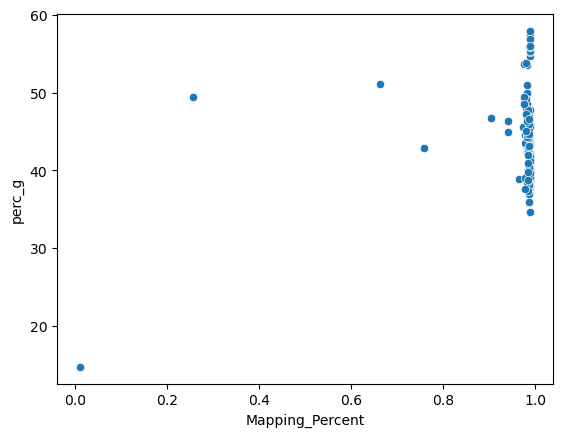

In [117]:
sns.scatterplot(data = meta[meta["Unnamed: 0"] == "Nonrepetitive"], x = "Mapping_Percent", y = "perc_g")

/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/373493097.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.swarmplot(data = meta[meta["Unnamed: 0"] == "Nonrepetitive"][meta["Mapping_Percent"] > 0.9], x = "Source", y = "perc_g", hue = "Water")
/user/noge4093/miniconda3/envs/orbicella/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/user/noge4093/miniconda3/envs/orbicella/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/user/noge4093/miniconda3/envs/orbicella/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use st

Text(46.972222222222214, 0.5, 'Percent Nonrepetitive Sequence')

/user/noge4093/miniconda3/envs/orbicella/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/user/noge4093/miniconda3/envs/orbicella/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


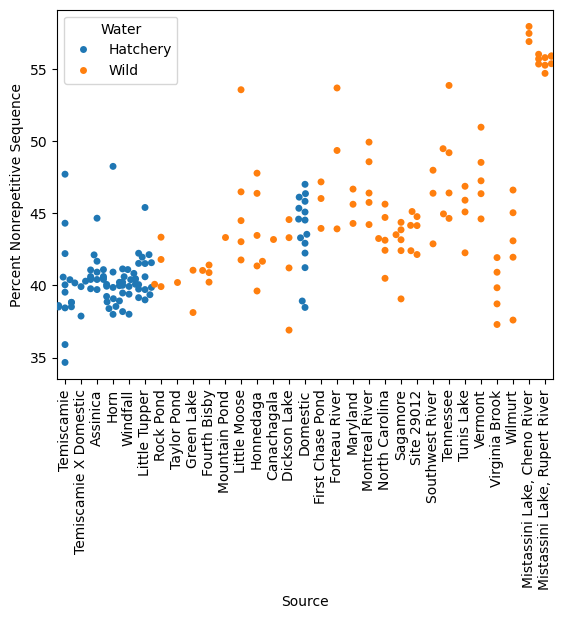

In [118]:
sns.swarmplot(data = meta[meta["Unnamed: 0"] == "Nonrepetitive"][meta["Mapping_Percent"] > 0.9], x = "Source", y = "perc_g", hue = "Water")
plt.xticks(rotation=90)
#plt.ylim(30,55)
plt.ylabel("Percent Nonrepetitive Sequence")

/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/3119103599.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = meta[meta["Unnamed: 0"] == "Nonrepetitive"][meta["Batch"] == 2], x = "Source", y = "perc_g", hue = "Water")


Text(0, 0.5, 'Percent Nonrepetitive Sequence')

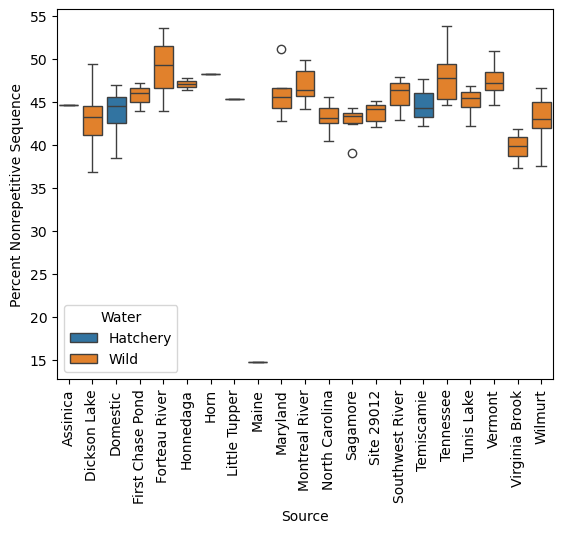

In [124]:
sns.boxplot(data = meta[meta["Unnamed: 0"] == "Nonrepetitive"][meta["Batch"] == 2], x = "Source", y = "perc_g", hue = "Water")
plt.xticks(rotation=90)
#plt.ylim(30,55)
plt.ylabel("Percent Nonrepetitive Sequence")

/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/2667614895.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.swarmplot(data = meta[meta["Unnamed: 0"] == i][meta["Batch"] == 2], x = "Source", y = "perc_g", hue = "Water")
/user/noge4093/miniconda3/envs/orbicella/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/user/noge4093/miniconda3/envs/orbicella/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/user/noge4093/miniconda3/envs/orbicella/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

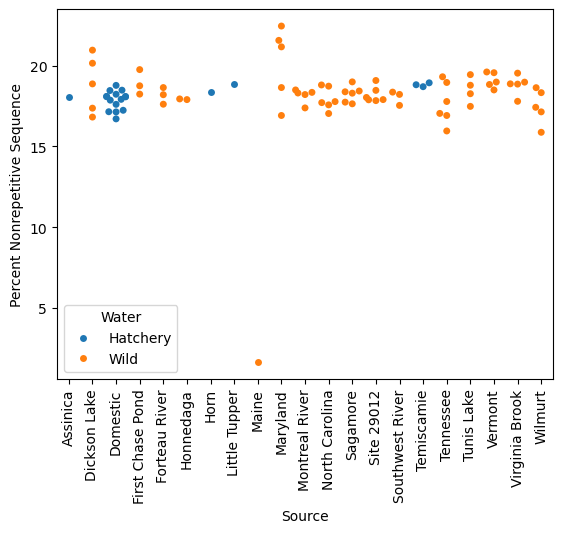

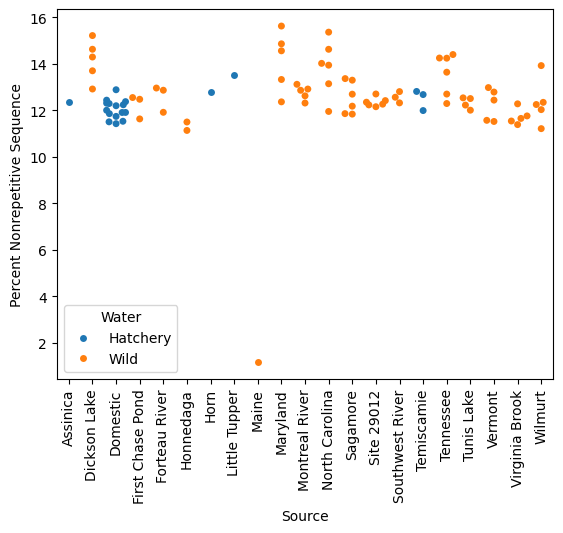

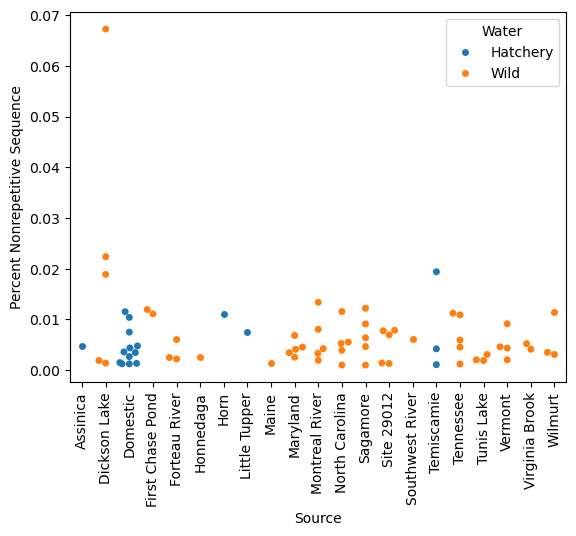

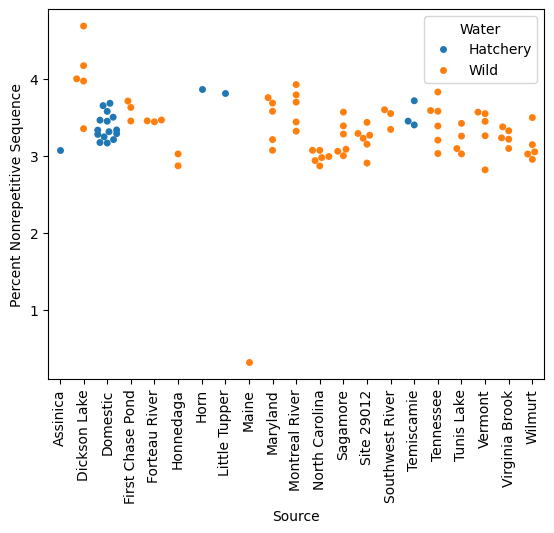

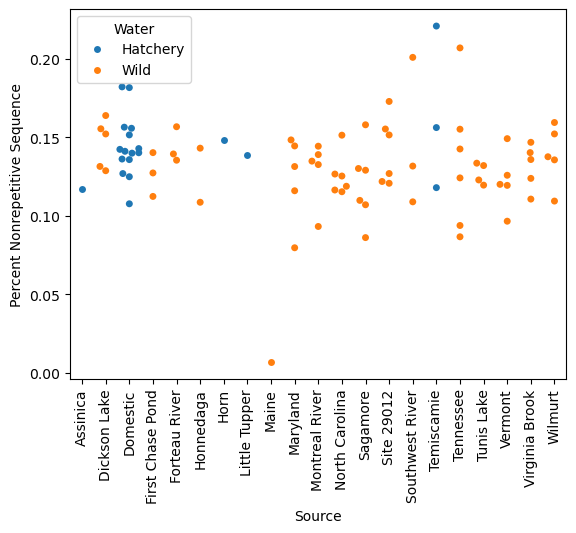

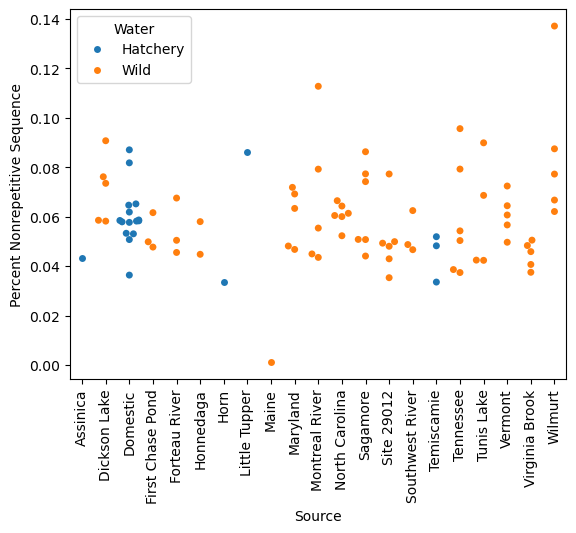

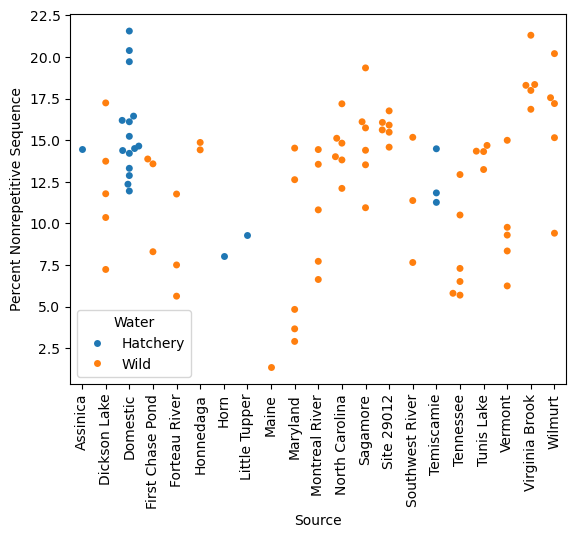

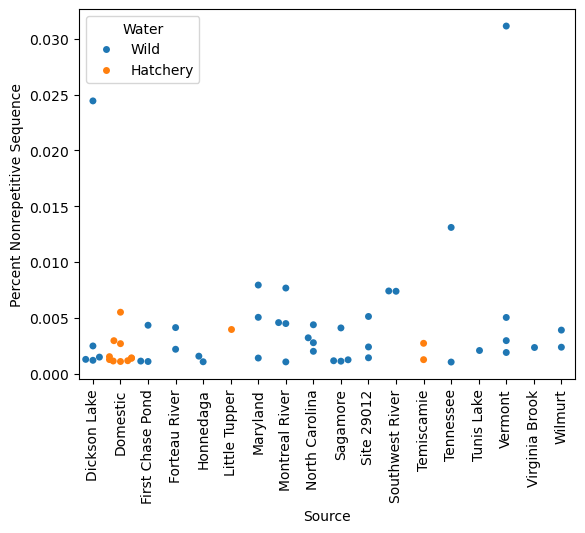

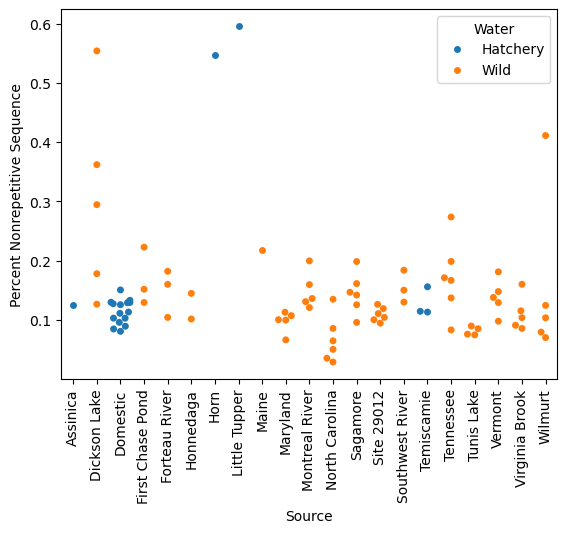

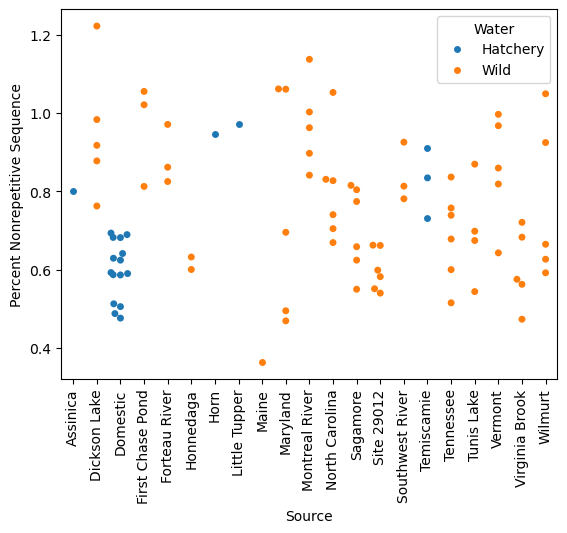

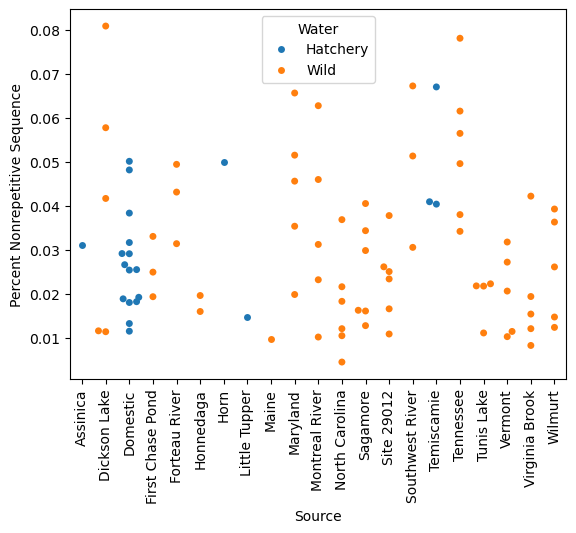

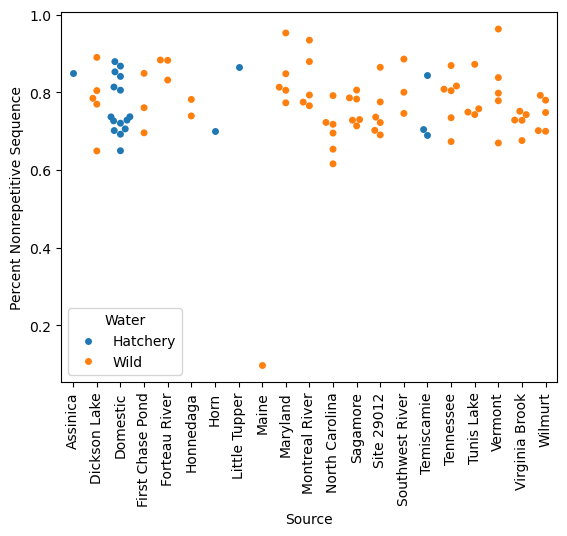

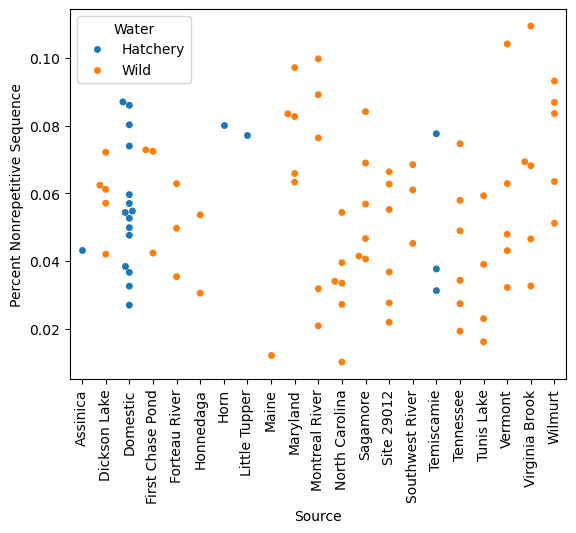

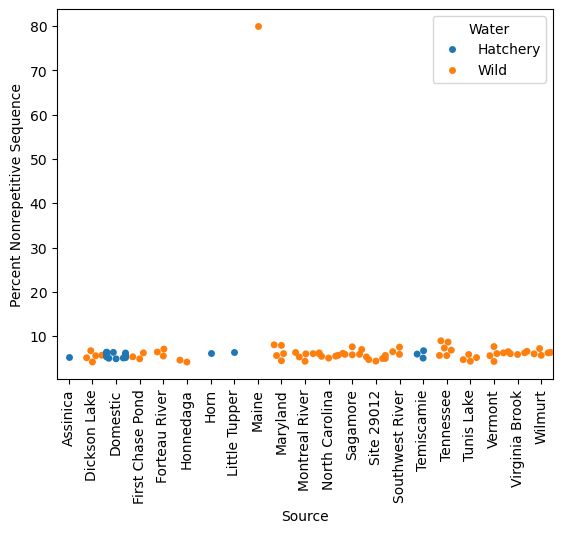

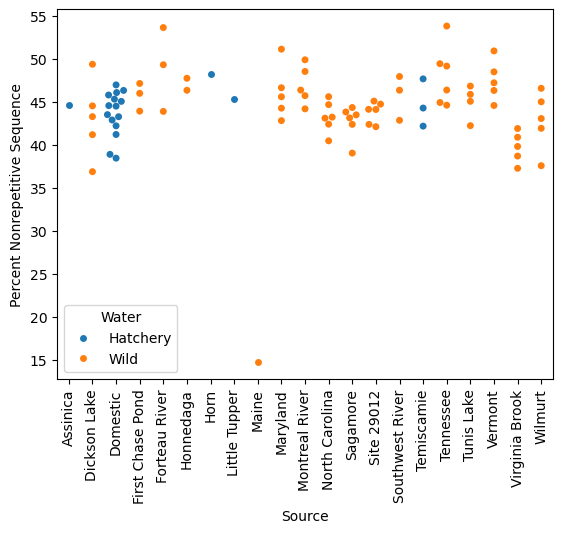

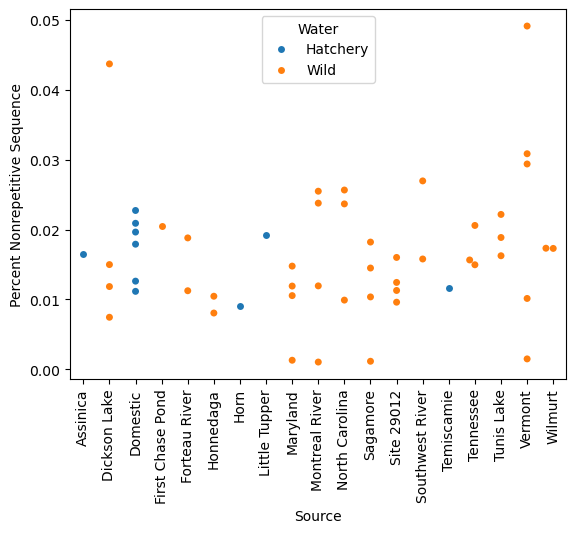

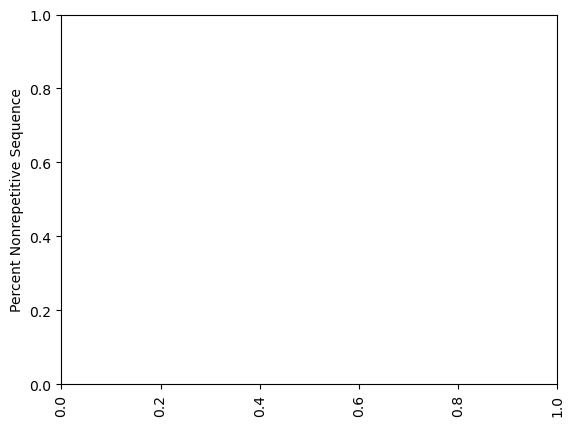

In [138]:
for i in meta["Unnamed: 0"].unique().tolist():
    plt.figure()
    sns.swarmplot(data = meta[meta["Unnamed: 0"] == i][meta["Batch"] == 2], x = "Source", y = "perc_g", hue = "Water")
    plt.xticks(rotation=90)
    
    plt.ylabel("Percent Nonrepetitive Sequence")

In [151]:
meta.columns

Index(['Sample_ID', 'FISH_N', 'Strain', 'Source', 'Water', 'NY Native?',
       'Notes', 'Batch', 'Unnamed: 0', 'perc_g', 'subc', 'csum', 'pos',
       'Mapping_Percent'],
      dtype='object')

/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/3161863792.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = meta[meta["Unnamed: 0"] == i][meta["Batch"] == 2][meta["Mapping_Percent"] > 0.98],
/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/3161863792.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = meta[meta["Unnamed: 0"] == i][meta["Batch"] == 2][meta["Mapping_Percent"] > 0.98],


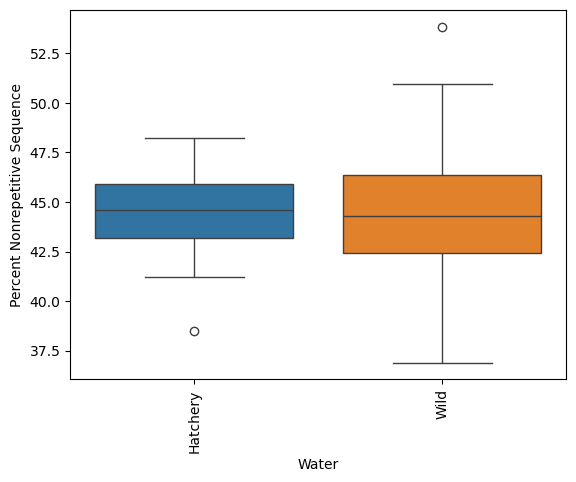

In [154]:
for i in ["Nonrepetitive"]:
    plt.figure()
    sns.boxplot(data = meta[meta["Unnamed: 0"] == i][meta["Batch"] == 2][meta["Mapping_Percent"] > 0.98], 
                  x = "Water", y = "perc_g", hue = "Water")
    plt.xticks(rotation=90)
    
    plt.ylabel("Percent Nonrepetitive Sequence")

/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/4228013496.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = meta[meta["Unnamed: 0"] == i][meta["Batch"] == 1][meta["Mapping_Percent"] > 0.98],
/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/4228013496.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = meta[meta["Unnamed: 0"] == i][meta["Batch"] == 1][meta["Mapping_Percent"] > 0.98],


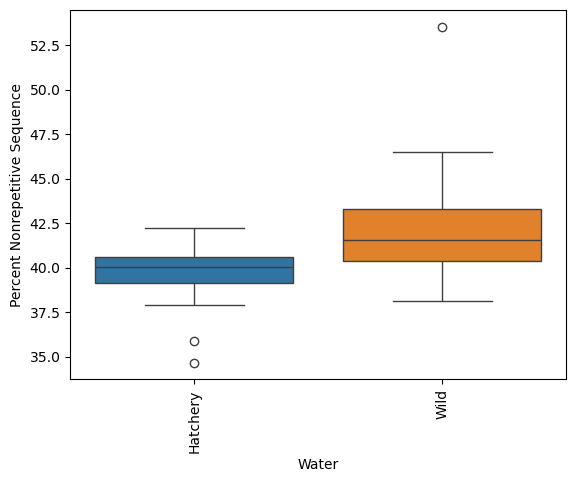

In [155]:
for i in ["Nonrepetitive"]:
    plt.figure()
    sns.boxplot(data = meta[meta["Unnamed: 0"] == i][meta["Batch"] == 1][meta["Mapping_Percent"] > 0.98], 
                  x = "Water", y = "perc_g", hue = "Water")
    plt.xticks(rotation=90)
    
    plt.ylabel("Percent Nonrepetitive Sequence")

/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/2206787651.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = meta[meta["Unnamed: 0"] == i][meta["Batch"] == 2][meta["Mapping_Percent"] > 0.9],
/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/2206787651.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = meta[meta["Unnamed: 0"] == i][meta["Batch"] == 2][meta["Mapping_Percent"] > 0.9],


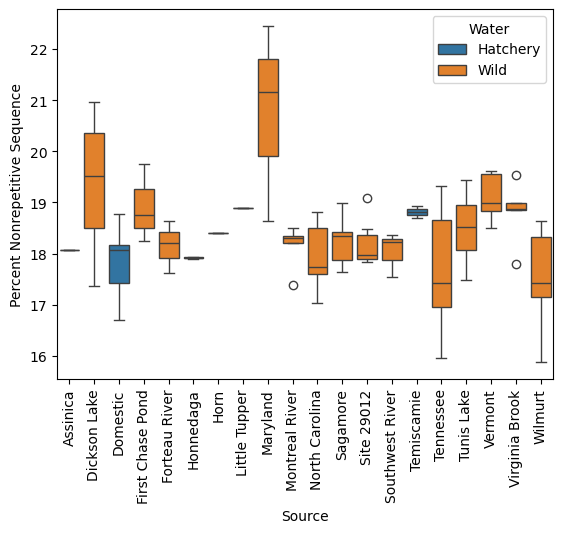

In [159]:
for i in ["DNA"]:
    plt.figure()
    sns.boxplot(data = meta[meta["Unnamed: 0"] == i][meta["Batch"] == 2][meta["Mapping_Percent"] > 0.9], 
                  x = "Source", y = "perc_g", hue = "Water")
    plt.xticks(rotation=90)
    
    plt.ylabel("Percent Nonrepetitive Sequence")

/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/1868282324.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = meta[meta["Unnamed: 0"] == i][meta["Batch"] == 1][meta["Mapping_Percent"] > 0.9],
/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/1868282324.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = meta[meta["Unnamed: 0"] == i][meta["Batch"] == 1][meta["Mapping_Percent"] > 0.9],


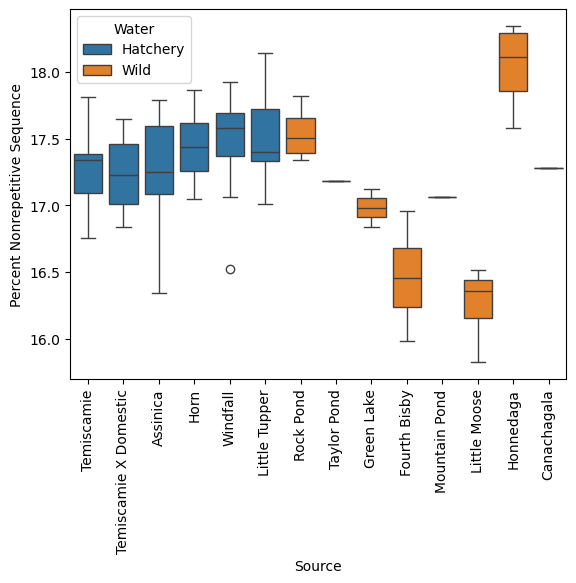

In [160]:
for i in ["DNA"]:
    plt.figure()
    sns.boxplot(data = meta[meta["Unnamed: 0"] == i][meta["Batch"] == 1][meta["Mapping_Percent"] > 0.9], 
                  x = "Source", y = "perc_g", hue = "Water")
    plt.xticks(rotation=90)
    
    plt.ylabel("Percent Nonrepetitive Sequence")

/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/2493419806.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = meta[meta["Unnamed: 0"] == "DNA"][meta["Mapping_Percent"] > 0.98], x = "Source", y = "perc_g", hue = "Water")


Text(0, 0.5, 'Percent Nonrepetitive Sequence')

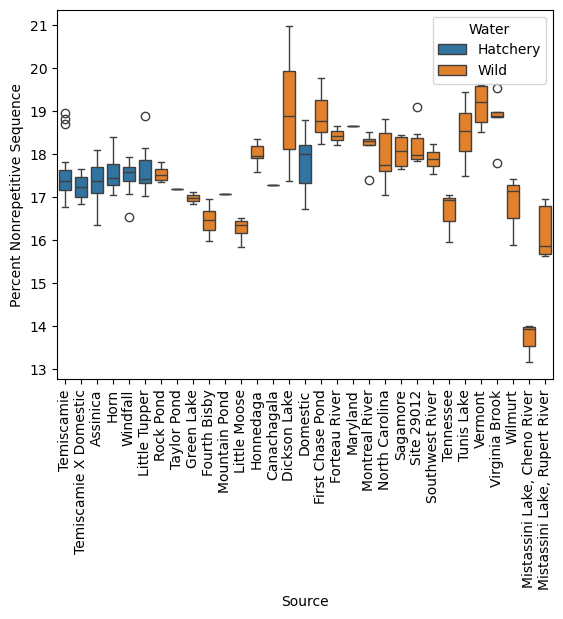

In [157]:
sns.boxplot(data = meta[meta["Unnamed: 0"] == "DNA"][meta["Mapping_Percent"] > 0.98], x = "Source", y = "perc_g", hue = "Water")
plt.xticks(rotation=90)
#plt.ylim(30,55)
plt.ylabel("Percent Nonrepetitive Sequence")

/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/43954101.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = meta[meta["Unnamed: 0"] == "Nonrepetitive"][meta["Mapping_Percent"] > 0.9], x = "Source", y = "perc_g")


Text(0, 0.5, 'Percent Nonrepetitive Sequence')

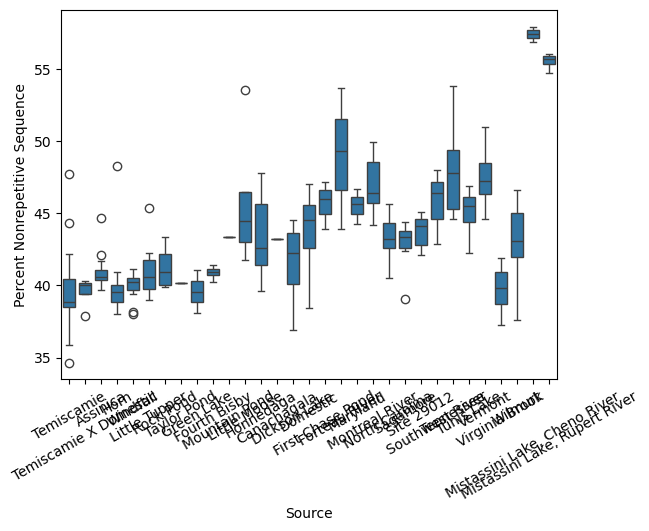

In [163]:
sns.boxplot(data = meta[meta["Unnamed: 0"] == "Nonrepetitive"][meta["Mapping_Percent"] > 0.9], x = "Source", y = "perc_g")
plt.xticks(rotation=30)
plt.ylabel("Percent Nonrepetitive Sequence")

/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/2998805972.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = meta[meta["Unnamed: 0"] == "Nonrepetitive"][meta["Mapping_Percent"] > 0.9], x = "Water", y = "perc_g")


Text(0, 0.5, 'Percent Nonrepetitive Sequence')

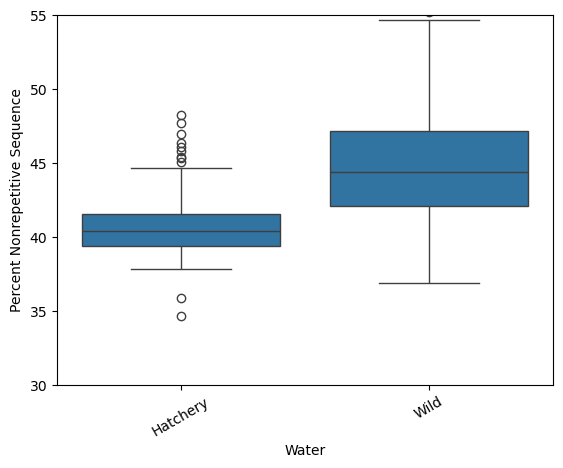

In [120]:
sns.boxplot(data = meta[meta["Unnamed: 0"] == "Nonrepetitive"][meta["Mapping_Percent"] > 0.9], x = "Water", y = "perc_g")
plt.xticks(rotation=30)
plt.ylim(30,55)
plt.ylabel("Percent Nonrepetitive Sequence")

/fs/dss/scratch/7044682_noge4093_mpcs046/ipykernel_2907565/854950711.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = meta[meta["Unnamed: 0"] == "Nonrepetitive"][meta["Mapping_Percent"] > 0.9], x = "Strain", y = "perc_g")


Text(0, 0.5, 'Percent Nonrepetitive Sequence')

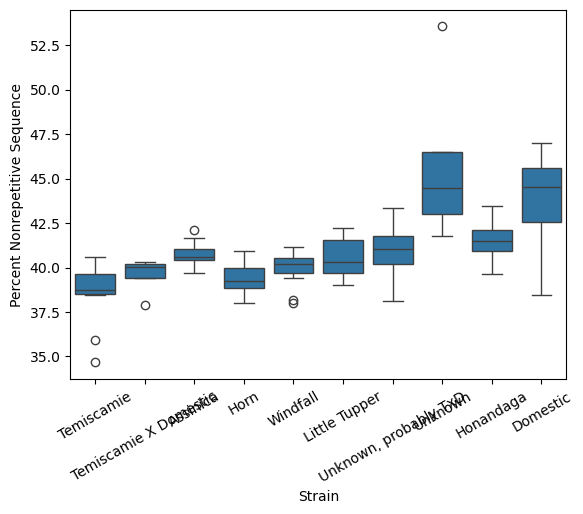

In [121]:
sns.boxplot(data = meta[meta["Unnamed: 0"] == "Nonrepetitive"][meta["Mapping_Percent"] > 0.9], x = "Strain", y = "perc_g")
plt.xticks(rotation=30)
plt.ylabel("Percent Nonrepetitive Sequence")